Founders and Financials: Machine Learning Algorithms in Venture Capital by Viktor Lado Naess and Emrik Stål



In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

spreadsheet = gc.open('final gen data')

worksheet = spreadsheet.worksheet('Sheet1')



data = worksheet.get_all_values()


import pandas as pd
df = pd.DataFrame(data[1:], columns=data[0])
import numpy as np
df.loc[:,'More than one round'] = df['More than one round'].astype(int)
df['Share female founders'] = df['Share female founders'].replace('', np.nan)
df.loc[:,'Share female founders'] = df['Share female founders'].astype(float)
df.loc[:,'Distance from Stockholm'] = df['Distance from Stockholm'].astype(float)
df.loc[:,'Serial Founder'] = df['Serial Founder'].astype(int)

df.loc[:,'Quick Ratio'] = df['Quick Ratio'].astype(float)
df.loc[:,'Return on Equity'] = df['Return on Equity'].astype(float)
# df.loc[:,'Net Sales'] = df['Net Sales'].astype(float)
df.loc[:,'Net Sales Ratio'] = df['Net Sales Ratio'].astype(float)

random_seed =8



import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
y = df['More than one round']
X = df.drop(columns=['More than one round'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed, stratify=y)
df

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newval

,More than one round,Distance from Stockholm,Serial Founder,Quick Ratio,Return on Equity,Net Sales Ratio,Share female founders
0,1,0.0,1,7.771084,-0.066599,0.000000,0.0
1,1,0.0,0,0.932476,-3.911765,0.041822,1.0
2,1,199.0,0,5.009434,-0.005038,0.011576,0.5
3,0,349.0,0,0.797285,0.552763,3.719583,0.0
4,1,0.0,1,0.177988,-15.655926,4.096376,0.0
...,...,...,...,...,...,...,...
193,1,492.0,1,2.222222,-0.064444,0.483824,0.5
194,0,8.4,0,0.839875,-20.157233,0.076042,0.0
195,1,637.0,0,3.902834,-0.290948,0.000342,0.0
196,1,172.0,0,0.654321,0.230769,0.186694,0.0


In [ ]:
from scipy import stats


columns = ['Return on Equity', 'Quick Ratio', 'Net Sales Ratio']


outlier_indices = set()

for col in columns:
    # Calculate Z-scores for the column
    z_scores = stats.zscore(df[col])

    # Find indices with Z score larger than 3
    outliers = df[abs(z_scores) > 3].index


    outlier_indices.update(outliers)

# Dropping the outliers
df = df.drop(index=outlier_indices)


df

,More than one round,Distance from Stockholm,Serial Founder,Quick Ratio,Return on Equity,Net Sales Ratio,Share female founders
0,1,0.0,1,7.771084,-0.066599,0.000000,0.0
1,1,0.0,0,0.932476,-3.911765,0.041822,1.0
2,1,199.0,0,5.009434,-0.005038,0.011576,0.5
3,0,349.0,0,0.797285,0.552763,3.719583,0.0
5,1,199.0,0,4.379085,1.195061,0.138474,0.0
...,...,...,...,...,...,...,...
192,1,469.0,0,5.937500,-0.232132,0.000000,0.0
193,1,492.0,1,2.222222,-0.064444,0.483824,0.5
195,1,637.0,0,3.902834,-0.290948,0.000342,0.0
196,1,172.0,0,0.654321,0.230769,0.186694,0.0


In [ ]:
df['More than one round'].value_counts()

1    133
0     58
Name: More than one round, dtype: int64

In [ ]:
# !pip install optuna
# import pandas as pd
# import optuna
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, brier_score_loss, roc_curve, roc_auc_score
# from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
# from sklearn.utils import resample
# from sklearn.model_selection import KFold

# rf_cols = ['More than one round', 'Distance from Stockholm', 'Serial Founder', 'Quick Ratio', 'Return on Equity', 'Net Sales Ratio','Share female founders']
# df=df[rf_cols]

# y = df['More than one round']
# X = df.drop(columns=['More than one round'])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed, stratify=y)

# parameter_ranges = [
#     {'n_estimators_range': (50, 200), 'max_depth_range': (1, 5)},
#     {'n_estimators_range': (50, 200), 'max_depth_range': (5, 10)},
#     {'n_estimators_range': (50, 200), 'max_depth_range': (10, 15)},
#     {'n_estimators_range': (200, 550), 'max_depth_range': (1, 5)},
#     {'n_estimators_range': (200, 550), 'max_depth_range': (5, 10)},
#     {'n_estimators_range': (200, 550), 'max_depth_range': (10, 15)},
# ]

# results1 = []

# for param_range in parameter_ranges:
#     def objective(trial):

#         n_estimators = trial.suggest_int('n_estimators', param_range['n_estimators_range'][0], param_range['n_estimators_range'][1])
#         max_depth = trial.suggest_int('max_depth', param_range['max_depth_range'][0], param_range['max_depth_range'][1])
#         min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
#         min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
#         max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
#         # strat_k_fold =trial.suggest_categorical('strat_k_fold', [7,StratifiedKFold(n_splits=7)])

#         rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
#                                     min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
#                                     max_features=max_features, random_state=random_seed)


#         rf.fit(X_train, y_train)
#         y_pred_best = rf.predict(X_train)
#         accuracy_best = accuracy_score(y_trian, y_pred_best)


#         #crossAcc
#         strat_k_fold=StratifiedKFold(n_splits=7, shuffle=True, random_state=random_seed)
#         crossAcc = cross_val_score(rf, X_train, y_train, cv=strat_k_fold, n_jobs=-1).mean()


#         return accuracy_best, crossAcc


#     sampler = optuna.samplers.TPESampler(seed=random_seed)
#     study = optuna.create_study(directions=['maximize', 'maximize'], sampler=sampler)
#     study = optuna.create_study(directions=['maximize', 'maximize'])
#     study.optimize(objective, n_trials=300)

#     for trial in study.best_trials:

#             best_rf = RandomForestClassifier(**trial.params)
#             best_rf.fit(X_train, y_train)

#             # Additional metrics calculations
#             cv_splitter = KFold(n_splits=7, shuffle=True, random_state=random_seed)


#             y_pred_best = best_rf.predict(X_test)
#             accuracy_best = accuracy_score(y_test, y_pred_best)
#             precision_best = precision_score(y_test, y_pred_best)
#             recall_best = recall_score(y_test, y_pred_best)
#             f1_best = f1_score(y_test, y_pred_best)
#             cross_val_best_rf = np.mean(cross_val_score(best_rf, X_train, y_train, cv=cv_splitter))
#             cross_val_best_rf_test = np.mean(cross_val_score(best_rf, X_test, y_test, cv=cv_splitter))
#             cross_val_best_rf_all = np.mean(cross_val_score(best_rf, X, y, cv=cv_splitter))
#             y_pred_probs_best = best_rf.predict_proba(X_test)[:, 1]
#             brier_score_best = brier_score_loss(y_test, y_pred_probs_best)
#             roc_auc_best = roc_auc_score(y_test, y_pred_probs_best)

#             # Bootstrap scores
#             rf_bootstrap_scores = []
#             n_bootstrap = 100
#             for seed in range(8, 8 + n_bootstrap):
#                 np.random.seed(seed)
#                 X_test_sample, y_test_sample = resample(X_test, y_test)
#                 y_pred_sample = best_rf.predict(X_test_sample)
#                 score = accuracy_score(y_test_sample, y_pred_sample)
#                 rf_bootstrap_scores.append(score)
#             rf_average_score = np.mean(rf_bootstrap_scores)
#             rf_variance_score = np.var(rf_bootstrap_scores)

#             #placebo
#             np.random.seed(random_seed)
#             X_train_random = np.random.random(size=X_train.shape)
#             rf_random = RandomForestClassifier(**trial.params)
#             rf_random.fit(X_train_random, y_train)
#             y_pred_random = rf_random.predict(X_test)
#             accuracy_random = accuracy_score(y_test, y_pred_random)

#             # Append results to the list
#             results1.append({
#                 'Parameter Range': param_range,
#                 'Best Hyperparameters': trial.params,
#                 'Accuracy': accuracy_best,
#                 'Cross Validation test Accuracy':cross_val_best_rf_test,
#                 'Bootstrap Average Score': rf_average_score,
#                 'Placebo Accuracy': accuracy_random,
#                 'Cross Validation train Accuracy': cross_val_best_rf,
#                 'Precision': precision_best,
#                 'Recall': recall_best,
#                 'F1 Score': f1_best,
#                 'Brier Score': brier_score_best,
#                 'ROC AUC Score': roc_auc_best,
#                 'Bootstrap Variance Score': rf_variance_score
#             })

# # Convert results list to DataFrame
# results_df1 = pd.DataFrame(results1)
# results_df1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.3 MB/s eta 0:00:00


[I 2023-11-23 16:35:52,725] A new study created in memory with name: no-name-48702c71-4980-4bf8-8b44-38083c2f7b03
[I 2023-11-23 16:35:52,729] A new study created in memory with name: no-name-5a18ca8a-9255-4eac-94e7-75984fe0ef68
[I 2023-11-23 16:35:55,723] Trial 0 finished with values: [0.7241379310344828, 0.7518796992481203] and parameters: {'n_estimators': 77, 'max_depth': 3, 'min_samples_split': 13, 'min_samples_leaf': 12, 'max_features': 'sqrt'}. 
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
[I 2023-11-23 16:35:57,417] Trial 1 finished with values: [0.7413793103448276, 0.7293233082706766] and parameters: {'n_estimators': 81, 'max_depth': 3, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_features': 'auto'}. 
[I 2023-11-23 16:36:00,160] Trial 2 finished with values: [0.7241

,Parameter Range,Best Hyperparameters,Accuracy,Cross Validation test Accuracy,Bootstrap Average Score,Placebo Accuracy,Cross Validation train Accuracy,Precision,Recall,F1 Score,Brier Score,ROC AUC Score,Bootstrap Variance Score
0,"{'n_estimators_range': (50, 200), 'max_depth_r...","{'n_estimators': 86, 'max_depth': 5, 'min_samp...",0.724138,0.656746,0.725172,0.603448,0.744361,0.750000,0.900,0.818182,0.179653,0.748611,0.003215
1,"{'n_estimators_range': (50, 200), 'max_depth_r...","{'n_estimators': 147, 'max_depth': 4, 'min_sam...",0.706897,0.607143,0.706379,0.568966,0.744361,0.734694,0.900,0.808989,0.192395,0.709722,0.003451
2,"{'n_estimators_range': (50, 200), 'max_depth_r...","{'n_estimators': 86, 'max_depth': 2, 'min_samp...",0.741379,0.690476,0.740000,0.689655,0.736842,0.745098,0.950,0.835165,0.196987,0.686111,0.002893
3,"{'n_estimators_range': (50, 200), 'max_depth_r...","{'n_estimators': 86, 'max_depth': 2, 'min_samp...",0.741379,0.690476,0.740000,0.689655,0.736842,0.745098,0.950,0.835165,0.196621,0.679167,0.002893
4,"{'n_estimators_range': (50, 200), 'max_depth_r...","{'n_estimators': 86, 'max_depth': 2, 'min_samp...",0.741379,0.690476,0.740000,0.689655,0.736842,0.745098,0.950,0.835165,0.196621,0.679167,0.002893
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,"{'n_estimators_range': (200, 550), 'max_depth_...","{'n_estimators': 231, 'max_depth': 12, 'min_sa...",0.741379,0.656746,0.740000,0.689655,0.751880,0.745098,0.950,0.835165,0.185008,0.730556,0.002893
224,"{'n_estimators_range': (200, 550), 'max_depth_...","{'n_estimators': 231, 'max_depth': 13, 'min_sa...",0.724138,0.656746,0.725000,0.689655,0.744361,0.740000,0.925,0.822222,0.183413,0.734722,0.003403
225,"{'n_estimators_range': (200, 550), 'max_depth_...","{'n_estimators': 527, 'max_depth': 15, 'min_sa...",0.775862,0.623016,0.772069,0.534483,0.736842,0.775510,0.950,0.853933,0.172591,0.770139,0.002905
226,"{'n_estimators_range': (200, 550), 'max_depth_...","{'n_estimators': 231, 'max_depth': 12, 'min_sa...",0.724138,0.656746,0.725000,0.689655,0.759398,0.740000,0.925,0.822222,0.185821,0.723611,0.003403


In [ ]:
# results_df1['Sum'] = results_df1['Accuracy'] + results_df1['Cross Validation test Accuracy'] + results_df1['Bootstrap Average Score'] -results_df1['Placebo Accuracy']
# results_df1['Processed_Min'] = results_df1[['Accuracy', 'Cross Validation test Accuracy', 'Bootstrap Average Score']].min(axis=1) - results_df1['Placebo Accuracy']

# normalized_df = (results_df1 - results_df1.min()) / (results_df1.max() - results_df1.min())
# results_df1['sum norm'] = normalized_df['Sum']
# results_df1['process norm'] = normalized_df['Processed_Min']


# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)  #
# results_df1

The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


,Parameter Range,Best Hyperparameters,Accuracy,Cross Validation test Accuracy,Bootstrap Average Score,Placebo Accuracy,Cross Validation train Accuracy,Precision,Recall,F1 Score,Brier Score,ROC AUC Score,Bootstrap Variance Score,Sum,Processed_Min,sum norm,process norm
0,"{'n_estimators_range': (50, 200), 'max_depth_range': (1, 5)}","{'n_estimators': 86, 'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': 'log2'}",0.724138,0.656746,0.725172,0.603448,0.744361,0.750000,0.900,0.818182,0.179653,0.748611,0.003215,1.502608,0.053298,0.412740,0.625245
1,"{'n_estimators_range': (50, 200), 'max_depth_range': (1, 5)}","{'n_estimators': 147, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'log2'}",0.706897,0.607143,0.706379,0.568966,0.744361,0.734694,0.900,0.808989,0.192395,0.709722,0.003451,1.451453,0.038177,0.265071,0.571184
2,"{'n_estimators_range': (50, 200), 'max_depth_range': (1, 5)}","{'n_estimators': 86, 'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 11, 'max_features': 'log2'}",0.741379,0.690476,0.740000,0.689655,0.736842,0.745098,0.950,0.835165,0.196987,0.686111,0.002893,1.482200,0.000821,0.353829,0.437622
3,"{'n_estimators_range': (50, 200), 'max_depth_range': (1, 5)}","{'n_estimators': 86, 'max_depth': 2, 'min_samples_split': 13, 'min_samples_leaf': 11, 'max_features': 'log2'}",0.741379,0.690476,0.740000,0.689655,0.736842,0.745098,0.950,0.835165,0.196621,0.679167,0.002893,1.482200,0.000821,0.353829,0.437622
4,"{'n_estimators_range': (50, 200), 'max_depth_range': (1, 5)}","{'n_estimators': 86, 'max_depth': 2, 'min_samples_split': 11, 'min_samples_leaf': 11, 'max_features': 'auto'}",0.741379,0.690476,0.740000,0.689655,0.736842,0.745098,0.950,0.835165,0.196621,0.679167,0.002893,1.482200,0.000821,0.353829,0.437622
5,"{'n_estimators_range': (50, 200), 'max_depth_range': (1, 5)}","{'n_estimators': 147, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}",0.706897,0.607143,0.706379,0.568966,0.744361,0.734694,0.900,0.808989,0.192395,0.709722,0.003451,1.451453,0.038177,0.265071,0.571184
6,"{'n_estimators_range': (50, 200), 'max_depth_range': (1, 5)}","{'n_estimators': 86, 'max_depth': 2, 'min_samples_split': 11, 'min_samples_leaf': 11, 'max_features': 'auto'}",0.741379,0.690476,0.740000,0.689655,0.736842,0.745098,0.950,0.835165,0.196987,0.686111,0.002893,1.482200,0.000821,0.353829,0.437622
7,"{'n_estimators_range': (50, 200), 'max_depth_range': (1, 5)}","{'n_estimators': 86, 'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 11, 'max_features': 'sqrt'}",0.741379,0.690476,0.740000,0.689655,0.736842,0.745098,0.950,0.835165,0.196621,0.679167,0.002893,1.482200,0.000821,0.353829,0.437622
8,"{'n_estimators_range': (50, 200), 'max_depth_range': (1, 5)}","{'n_estimators': 86, 'max_depth': 2, 'min_samples_split': 9, 'min_samples_leaf': 11, 'max_features': 'log2'}",0.741379,0.690476,0.740000,0.689655,0.736842,0.745098,0.950,0.835165,0.196621,0.679167,0.002893,1.482200,0.000821,0.353829,0.437622
9,"{'n_estimators_range': (50, 200), 'max_depth_range': (1, 5)}","{'n_estimators': 86, 'max_depth': 2, 'min_samples_split': 9, 'min_samples_leaf': 11, 'max_features': 'auto'}",0.741379,0.690476,0.740000,0.689655,0.736842,0.745098,0.950,0.835165,0.196621,0.679167,0.002893,1.482200,0.000821,0.353829,0.437622


In [ ]:
# results_df1['final vals'] = results_df1['sum norm'] + results_df1['process norm']
# results_df1

,Parameter Range,Best Hyperparameters,Accuracy,Cross Validation test Accuracy,Bootstrap Average Score,Placebo Accuracy,Cross Validation train Accuracy,Precision,Recall,F1 Score,Brier Score,ROC AUC Score,Bootstrap Variance Score,Sum,Processed_Min,sum norm,process norm,final vals
0,"{'n_estimators_range': (50, 200), 'max_depth_range': (1, 5)}","{'n_estimators': 86, 'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': 'log2'}",0.724138,0.656746,0.725172,0.603448,0.744361,0.750000,0.900,0.818182,0.179653,0.748611,0.003215,1.502608,0.053298,0.412740,0.625245,1.037984
1,"{'n_estimators_range': (50, 200), 'max_depth_range': (1, 5)}","{'n_estimators': 147, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'log2'}",0.706897,0.607143,0.706379,0.568966,0.744361,0.734694,0.900,0.808989,0.192395,0.709722,0.003451,1.451453,0.038177,0.265071,0.571184,0.836255
2,"{'n_estimators_range': (50, 200), 'max_depth_range': (1, 5)}","{'n_estimators': 86, 'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 11, 'max_features': 'log2'}",0.741379,0.690476,0.740000,0.689655,0.736842,0.745098,0.950,0.835165,0.196987,0.686111,0.002893,1.482200,0.000821,0.353829,0.437622,0.791451
3,"{'n_estimators_range': (50, 200), 'max_depth_range': (1, 5)}","{'n_estimators': 86, 'max_depth': 2, 'min_samples_split': 13, 'min_samples_leaf': 11, 'max_features': 'log2'}",0.741379,0.690476,0.740000,0.689655,0.736842,0.745098,0.950,0.835165,0.196621,0.679167,0.002893,1.482200,0.000821,0.353829,0.437622,0.791451
4,"{'n_estimators_range': (50, 200), 'max_depth_range': (1, 5)}","{'n_estimators': 86, 'max_depth': 2, 'min_samples_split': 11, 'min_samples_leaf': 11, 'max_features': 'auto'}",0.741379,0.690476,0.740000,0.689655,0.736842,0.745098,0.950,0.835165,0.196621,0.679167,0.002893,1.482200,0.000821,0.353829,0.437622,0.791451
5,"{'n_estimators_range': (50, 200), 'max_depth_range': (1, 5)}","{'n_estimators': 147, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'auto'}",0.706897,0.607143,0.706379,0.568966,0.744361,0.734694,0.900,0.808989,0.192395,0.709722,0.003451,1.451453,0.038177,0.265071,0.571184,0.836255
6,"{'n_estimators_range': (50, 200), 'max_depth_range': (1, 5)}","{'n_estimators': 86, 'max_depth': 2, 'min_samples_split': 11, 'min_samples_leaf': 11, 'max_features': 'auto'}",0.741379,0.690476,0.740000,0.689655,0.736842,0.745098,0.950,0.835165,0.196987,0.686111,0.002893,1.482200,0.000821,0.353829,0.437622,0.791451
7,"{'n_estimators_range': (50, 200), 'max_depth_range': (1, 5)}","{'n_estimators': 86, 'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 11, 'max_features': 'sqrt'}",0.741379,0.690476,0.740000,0.689655,0.736842,0.745098,0.950,0.835165,0.196621,0.679167,0.002893,1.482200,0.000821,0.353829,0.437622,0.791451
8,"{'n_estimators_range': (50, 200), 'max_depth_range': (1, 5)}","{'n_estimators': 86, 'max_depth': 2, 'min_samples_split': 9, 'min_samples_leaf': 11, 'max_features': 'log2'}",0.741379,0.690476,0.740000,0.689655,0.736842,0.745098,0.950,0.835165,0.196621,0.679167,0.002893,1.482200,0.000821,0.353829,0.437622,0.791451
9,"{'n_estimators_range': (50, 200), 'max_depth_range': (1, 5)}","{'n_estimators': 86, 'max_depth': 2, 'min_samples_split': 9, 'min_samples_leaf': 11, 'max_features': 'auto'}",0.741379,0.690476,0.740000,0.689655,0.736842,0.745098,0.950,0.835165,0.196621,0.679167,0.002893,1.482200,0.000821,0.353829,0.437622,0.791451


In [ ]:
# max_final_vals_index = results_df1['final vals'].idxmax()

# # Extract the row with the highest 'final vals'
# highest_val = results_df1.loc[max_final_vals_index]
# highest_val

Parameter Range                                                                  {'n_estimators_range': (200, 550), 'max_depth_range': (10, 15)}
Best Hyperparameters               {'n_estimators': 245, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto'}
Accuracy                                                                                                                                0.775862
Cross Validation test Accuracy                                                                                                          0.640873
Bootstrap Average Score                                                                                                                 0.772069
Placebo Accuracy                                                                                                                        0.482759
Cross Validation train Accuracy                                                                                                   

In [ ]:
# max_pro_index = results_df1['process norm'].idxmax()

# # Extract the row with the highest 'final vals'
# highest_pro = results_df1.loc[max_pro_index]
# highest_pro

Parameter Range                                                                  {'n_estimators_range': (200, 550), 'max_depth_range': (10, 15)}
Best Hyperparameters               {'n_estimators': 245, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto'}
Accuracy                                                                                                                                0.775862
Cross Validation test Accuracy                                                                                                          0.640873
Bootstrap Average Score                                                                                                                 0.772069
Placebo Accuracy                                                                                                                        0.482759
Cross Validation train Accuracy                                                                                                   

In [ ]:
# best_hyperparams = highest_val['Best Hyperparameters']


#rf analysis

In [ ]:
rf_cols = ['More than one round', 'Distance from Stockholm', 'Serial Founder', 'Quick Ratio', 'Return on Equity', 'Net Sales Ratio','Share female founders']
df=df[rf_cols]

y = df['More than one round']
X = df.drop(columns=['More than one round'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed, stratify=y)

In [ ]:
# del best_rf
from sklearn.ensemble import RandomForestClassifier
rf_cols = ['More than one round', 'Distance from Stockholm', 'Serial Founder', 'Quick Ratio', 'Return on Equity', 'Net Sales Ratio','Share female founders']
df=df[rf_cols]

y = df['More than one round']
X = df.drop(columns=['More than one round'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed, stratify=y)


best_rf = RandomForestClassifier(n_estimators= 245, max_depth= 14, min_samples_split= 2, min_samples_leaf= 1, max_features= 'auto')
# best_rf = RandomForestClassifier(**best_hyperparams)
best_rf.fit(X_train, y_train)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.


RandomForestClassifier(max_depth=14, max_features='auto', n_estimators=245)

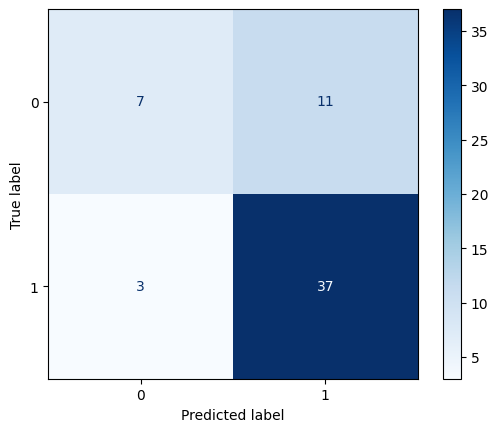

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
disp.ax_.grid(False)
plt.show()

In [ ]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances

Return on Equity           0.332337
Net Sales Ratio            0.272720
Quick Ratio                0.221654
Distance from Stockholm    0.114739
Share female founders      0.029610
Serial Founder             0.028940
dtype: float64

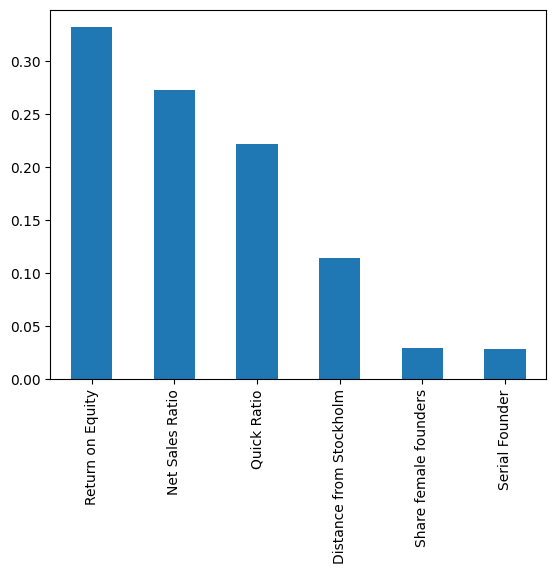

In [ ]:
feature_importances.plot.bar();

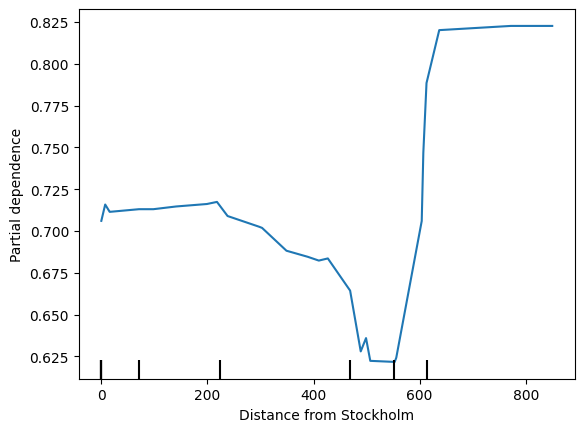

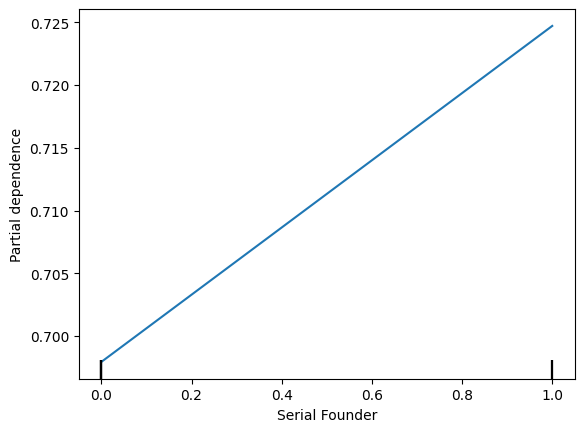

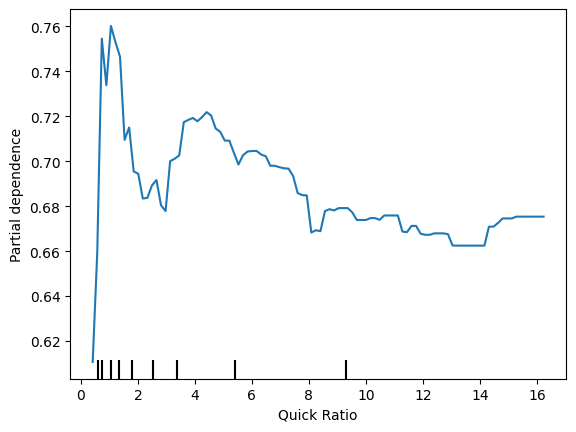

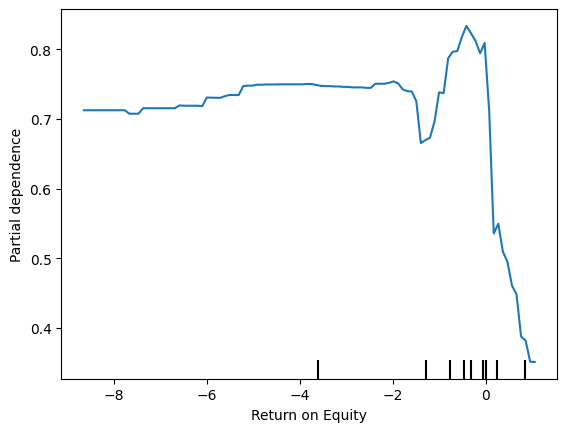

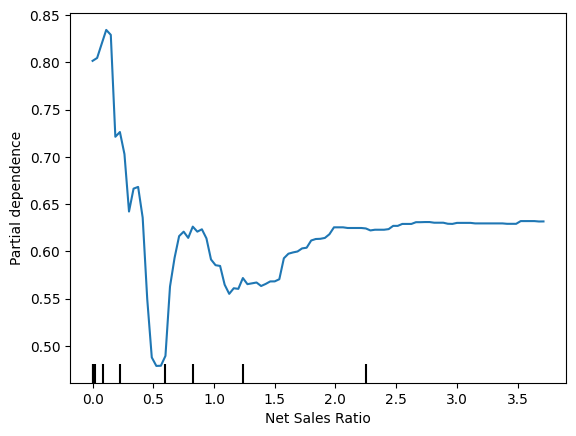

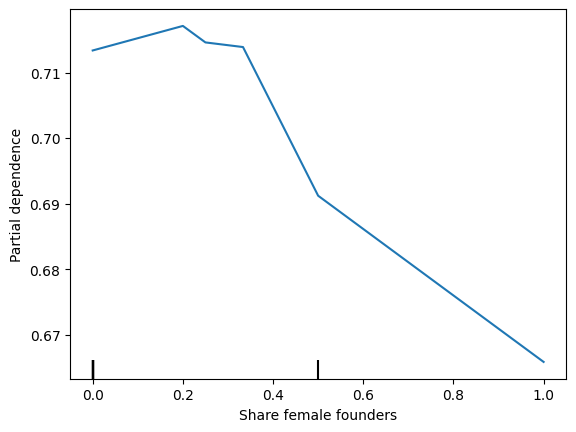

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(best_rf, X_train, features=['Distance from Stockholm'], kind = "average")
PartialDependenceDisplay.from_estimator(best_rf, X_train, features=['Serial Founder'], kind = "average")
PartialDependenceDisplay.from_estimator(best_rf, X_train, features=['Quick Ratio'], kind = "average")
PartialDependenceDisplay.from_estimator(best_rf, X_train, features=['Return on Equity'], kind = "average")
PartialDependenceDisplay.from_estimator(best_rf, X_train, features=['Net Sales Ratio'], kind = "average")
PartialDependenceDisplay.from_estimator(best_rf, X_train, features=['Share female founders'], kind = "average")


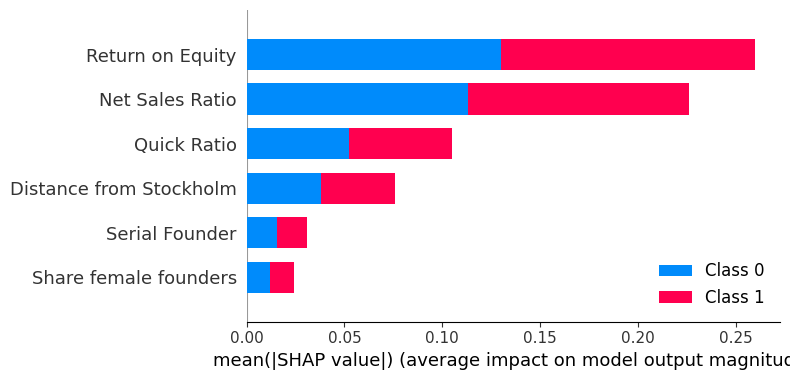

In [ ]:
!pip install shap
import shap
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

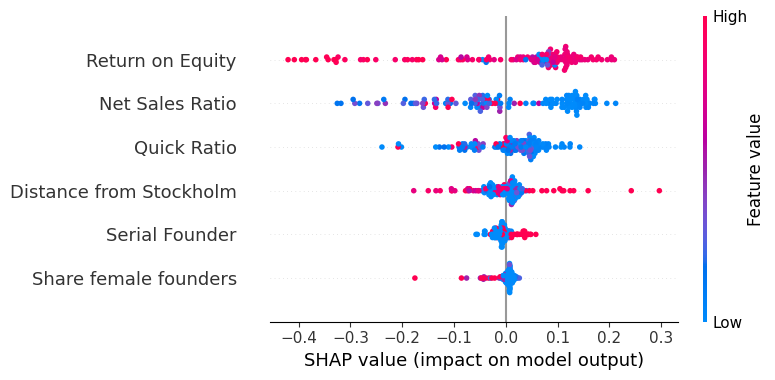

In [ ]:
shap.summary_plot(shap_values[1], X_train)

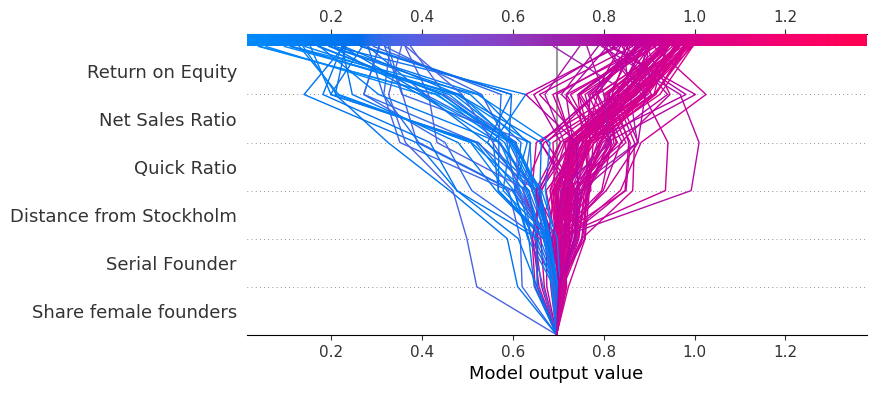

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.columns)

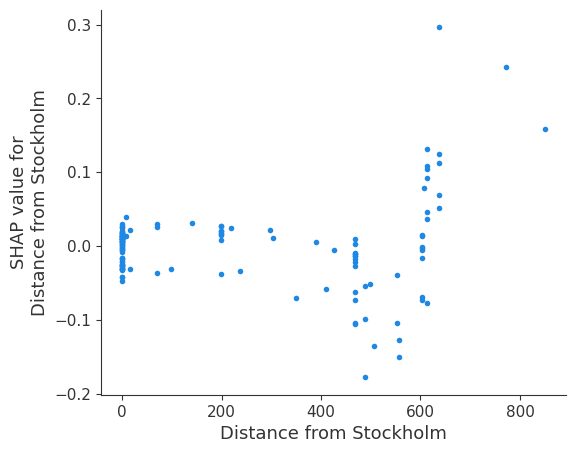

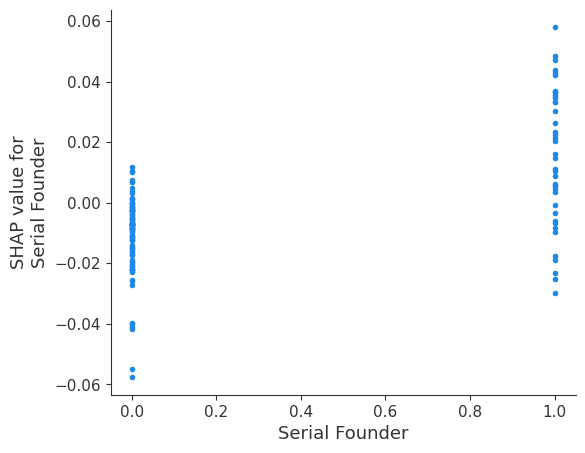

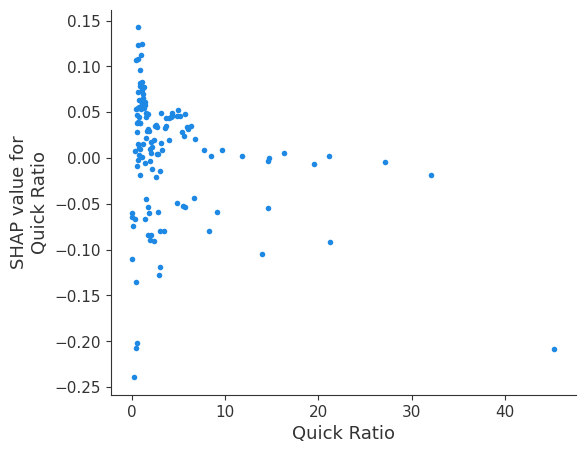

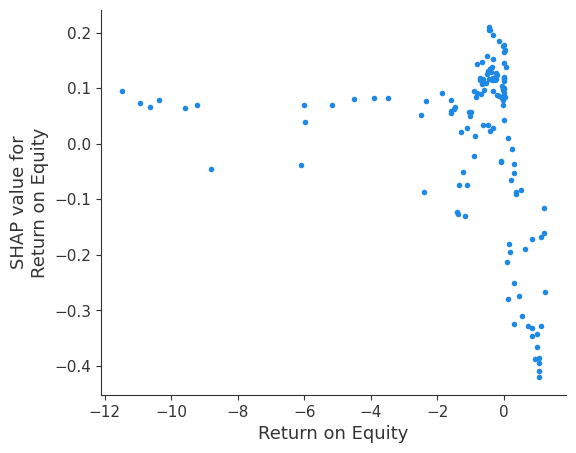

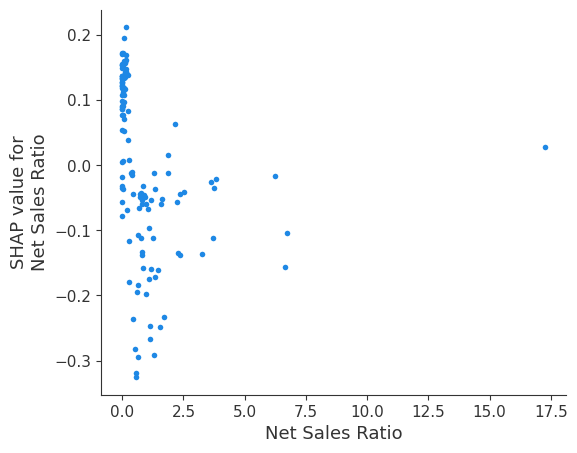

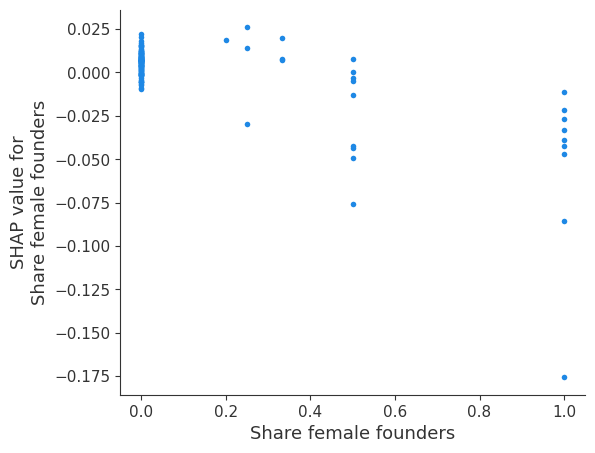

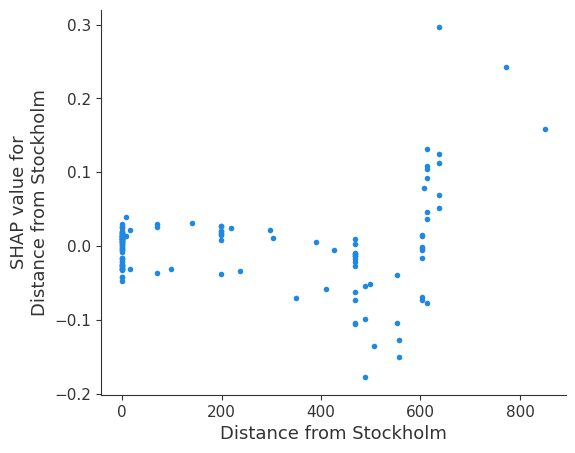

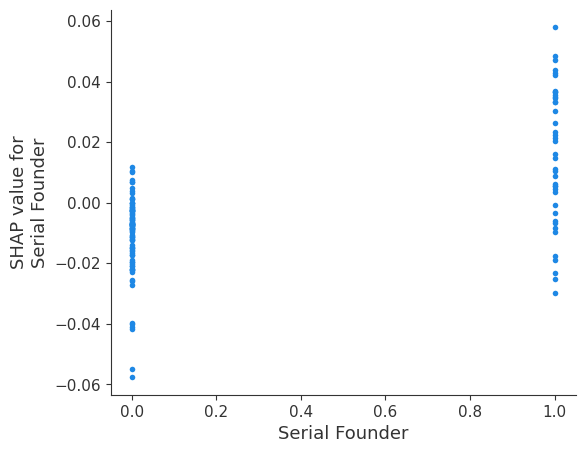

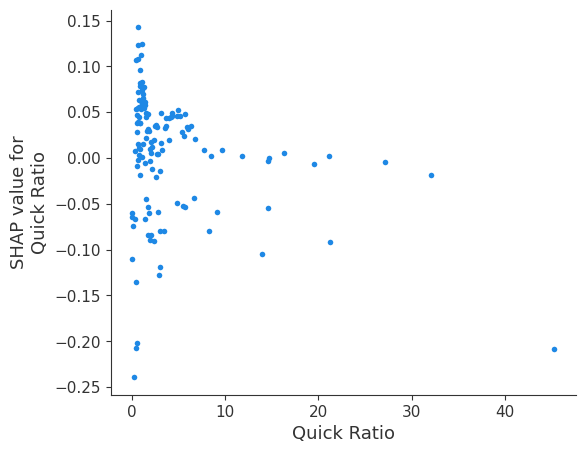

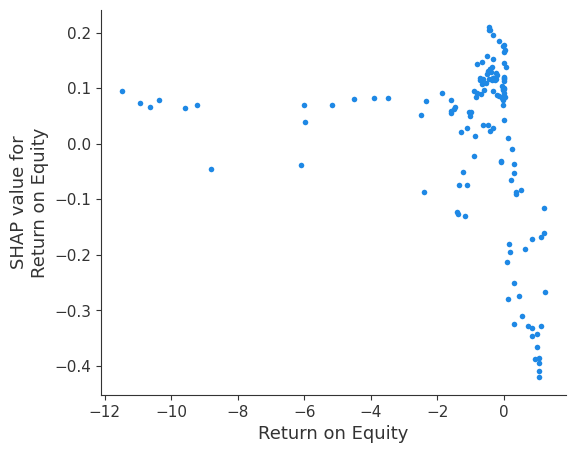

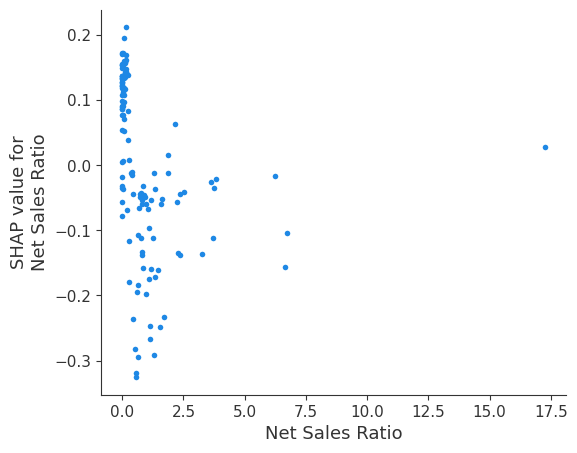

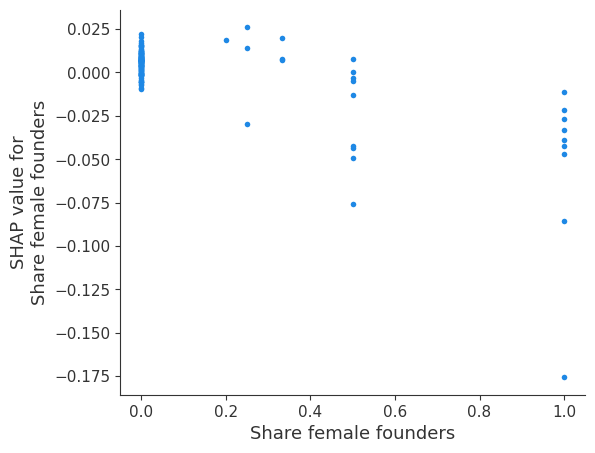

In [ ]:
for i in range(len(shap_values)):

    for feature_index in range(X_train.shape[1]):
        shap.dependence_plot(feature_index, shap_values[1], X_train, interaction_index=None)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, brier_score_loss, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split, StratifiedKFold
from sklearn.utils import resample
import numpy as np
import pandas as pd


logres = []
# Create a Logistic Regression model

best_logit = LogisticRegression(max_iter=45, solver='liblinear')


best_logit.fit(X_train, y_train)

# Additional metrics calculations
cv_splitter = KFold(n_splits=7, shuffle=True, random_state=random_seed)

y_pred_best = best_logit.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
cross_val_best_logit = np.mean(cross_val_score(best_logit, X_train, y_train, cv=cv_splitter))
cross_val_best_logit_test = np.mean(cross_val_score(best_logit, X_test, y_test, cv=cv_splitter))
cross_val_best_logit_all = np.mean(cross_val_score(best_logit, X, y, cv=cv_splitter))
y_pred_probs_best = best_logit.predict_proba(X_test)[:, 1]
brier_score_best = brier_score_loss(y_test, y_pred_probs_best)
roc_auc_best = roc_auc_score(y_test, y_pred_probs_best)

# Bootstrap scores
logit_bootstrap_scores = []
n_bootstrap = 100
for seed in range(8, 8 + n_bootstrap):
    np.random.seed(seed)
    X_test_sample, y_test_sample = resample(X_test, y_test)
    y_pred_sample = best_logit.predict(X_test_sample)
    score = accuracy_score(y_test_sample, y_pred_sample)
    logit_bootstrap_scores.append(score)
logit_average_score = np.mean(logit_bootstrap_scores)
logit_variance_score = np.var(logit_bootstrap_scores)

# Placebo test
np.random.seed(random_seed)
X_train_random = np.random.random(size=X_train.shape)
logit_random = LogisticRegression()
logit_random.fit(X_train_random, y_train)
y_pred_random = logit_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)

logres.append({
    'Model': 'Logit',
    'Accuracy': accuracy_best,
    'Cross Validation test Accuracy': cross_val_best_logit_test,
    'Bootstrap Average Score': logit_average_score,
    'Placebo Accuracy': accuracy_random,
    'Cross Validation train Accuracy': cross_val_best_logit,
    'Precision': precision_best,
    'Recall': recall_best,
    'F1 Score': f1_best,
    'Brier Score': brier_score_best,
    'ROC AUC Score': roc_auc_best,
    'Bootstrap Variance Score': logit_variance_score
})

# Convert logres list to DataFrame
logres_df = pd.DataFrame(logres)
logres_df


X has feature names, but LogisticRegression was fitted without feature names


,Model,Accuracy,Cross Validation test Accuracy,Bootstrap Average Score,Placebo Accuracy,Cross Validation train Accuracy,Precision,Recall,F1 Score,Brier Score,ROC AUC Score,Bootstrap Variance Score
0,Logit,0.689655,0.640873,0.693793,0.62069,0.684211,0.703704,0.95,0.808511,0.216152,0.554167,0.00311


In [ ]:
#The below code can be used if the notebook times out

best_rf.fit(X_train, y_train)

# Additional metrics calculations
cv_splitter = KFold(n_splits=7, shuffle=True, random_state=random_seed)

y_pred_best = best_rf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
cross_val_best_rf = np.mean(cross_val_score(best_rf, X_train, y_train, cv=cv_splitter))
cross_val_best_rf_test = np.mean(cross_val_score(best_rf, X_test, y_test, cv=cv_splitter))
cross_val_best_rf_all = np.mean(cross_val_score(best_rf, X, y, cv=cv_splitter))
y_pred_probs_best = best_rf.predict_proba(X_test)[:, 1]
brier_score_best = brier_score_loss(y_test, y_pred_probs_best)
roc_auc_best = roc_auc_score(y_test, y_pred_probs_best)

# Bootstrap scores
rf_bootstrap_scores = []
n_bootstrap = 100
for seed in range(8, 8 + n_bootstrap):
    np.random.seed(seed)
    X_test_sample, y_test_sample = resample(X_test, y_test)
    y_pred_sample = best_rf.predict(X_test_sample)
    score = accuracy_score(y_test_sample, y_pred_sample)
    rf_bootstrap_scores.append(score)
rf_average_score = np.mean(rf_bootstrap_scores)
rf_variance_score = np.var(rf_bootstrap_scores)

# Placebo test
np.random.seed(random_seed)
X_train_random = np.random.random(size=X_train.shape)
rf_random = LogisticRegression()
rf_random.fit(X_train_random, y_train)
y_pred_random = rf_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)

logres.append({
    'Model': 'rf',
    'Accuracy': accuracy_best,
    'Cross Validation test Accuracy': cross_val_best_rf_test,
    'Bootstrap Average Score': rf_average_score,
    'Placebo Accuracy': accuracy_random,
    'Cross Validation train Accuracy': cross_val_best_rf,
    'Precision': precision_best,
    'Recall': recall_best,
    'F1 Score': f1_best,
    'Brier Score': brier_score_best,
    'ROC AUC Score': roc_auc_best,
    'Bootstrap Variance Score': rf_variance_score
})

# Convert logres list to DataFrame
logres_df = pd.DataFrame(logres)
logres_df


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTr

,Model,Accuracy,Cross Validation test Accuracy,Bootstrap Average Score,Placebo Accuracy,Cross Validation train Accuracy,Precision,Recall,F1 Score,Brier Score,ROC AUC Score,Bootstrap Variance Score
0,Logit,0.689655,0.640873,0.693793,0.62069,0.684211,0.703704,0.950,0.808511,0.216152,0.554167,0.003110
1,rf,0.758621,0.640873,0.757414,0.62069,0.744361,0.770833,0.925,0.840909,0.179063,0.755556,0.003022


In [ ]:
# # If the full optimzaiton code was used this should be included and the previous cell should be commented out
# columns_to_drop = ['Parameter Range', 'Best Hyperparameters', 'Sum', 'Processed_Min', 'sum norm', 'process norm','final vals']

# # Drop the specified columns
# highest_val['Model'] = 'Random forest'
# clean_highest_val = highest_val.drop(columns_to_drop)
# logres_df = logres_df.append(clean_highest_val, ignore_index=True)


In [ ]:
logres_df

,Model,Accuracy,Cross Validation test Accuracy,Bootstrap Average Score,Placebo Accuracy,Cross Validation train Accuracy,Precision,Recall,F1 Score,Brier Score,ROC AUC Score,Bootstrap Variance Score
0,Logit,0.689655,0.640873,0.693793,0.62069,0.684211,0.703704,0.950,0.808511,0.216152,0.554167,0.003110
1,rf,0.758621,0.640873,0.757414,0.62069,0.744361,0.770833,0.925,0.840909,0.179063,0.755556,0.003022


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

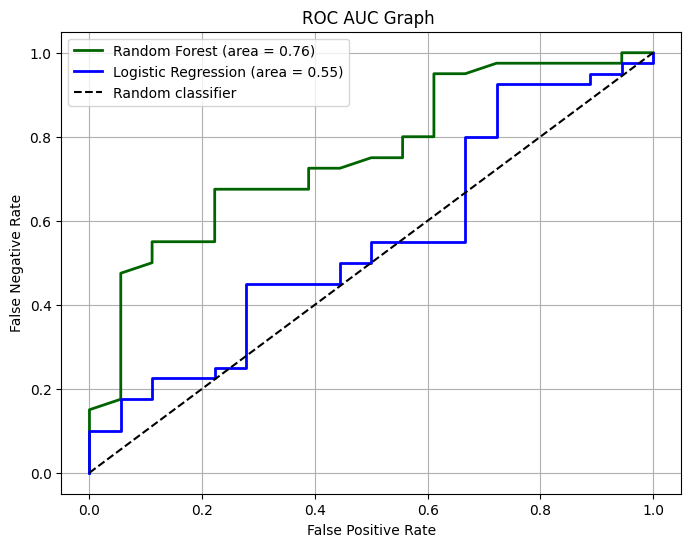

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_pred_probs_rf = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred_probs_logit = best_logit.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_logit, tpr_logit, _ = roc_curve(y_test, y_pred_probs_logit)
roc_auc_logit = auc(fpr_logit, tpr_logit)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot(fpr_logit, tpr_logit, color='blue', lw=2, label=f'Logistic Regression (area = {roc_auc_logit:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('False Negative Rate')
plt.title('ROC AUC Graph ')
plt.legend()
plt.grid(True)
plt

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
y_scores_best_logit = best_logit.predict_proba(X_test)[:, 1]
y_scores_best_rf = best_rf.predict_proba(X_test)[:, 1]



precision_best_logit, recall_best_logit, thresholds_best_logit = precision_recall_curve(y_test, y_scores_best_logit)
precision_best_rf, recall_best_rf, thresholds_best_rf = precision_recall_curve(y_test, y_scores_best_rf)


plt.figure(figsize=(10, 7))
plt.plot(recall_best_logit, precision_best_logit, label='Logit', color='blue')
plt.plot(recall_best_rf, precision_best_rf, label='Random Forest', color='darkgreen')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show

In [ ]:
import pandas as pd

# Assuming rf_bootstrap_scores is already calculated and is a list of scores
# and logit_bootstrap_scores is the list you provided in the previous code snippet

# Combine the two lists into a dictionary with appropriate column names
data = {
    'RF_Bootstrap_Scores': rf_bootstrap_scores,
    'Logit_Bootstrap_Scores': logit_bootstrap_scores
}

# Create the DataFrame from the dictionary
bootstrap_scores_df = pd.DataFrame(data)


bootstrap_scores_df

NameError: ignored